Google Net inception modellerinde olduğu gibi tek bir hatla başlayıp iki dala ayrılan sonra tekrara birleşen bir model oluşturmaya çalışalım.

In [6]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten#Vectörize etmek için gerekli.
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

#Giriş Katmanı

In [7]:
visible = Input(shape=(64,64,1))


#Öznitelikn Çıkarma İşlemleri İçin Evrişim Katmanı

In [10]:
#İki evrişim işlemi farklı işlemleri yapıyor aynı girişi kullanarak içinde.
#1. evrişim katmanı
conv1 = Conv2D(32, kernel_size = 4, activation = 'relu')(visible)

pool1 = MaxPooling2D(pool_size =(2,2))(conv1)

flat1 = Flatten()(pool1)

#2. evrişim katmanı
conv2 = Conv2D(16, kernel_size = 8, activation = 'relu')(visible)

pool2 = MaxPooling2D(pool_size =(2,2))(conv2)

flat2 = Flatten()(pool2)

#merge ettiğimiz katman 3. Katman(Birleştirme katmanındaki öznitelik çıkarma işlemi )
merge = concatenate([flat1, flat2])

hidden1 = Dense(10, activation = 'relu')(merge)#Tam bağlantılı bir sinir ağı

#Çıkış katmanı
output = Dense(1, activation = 'sigmoid')(hidden1)
model = Model(inputs = visible, outputs=output)

#Modeli özetleyelim.
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 32)   544         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 57, 57, 16)   1040        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_1[0][0]                   
_______________________________________________________________________________________

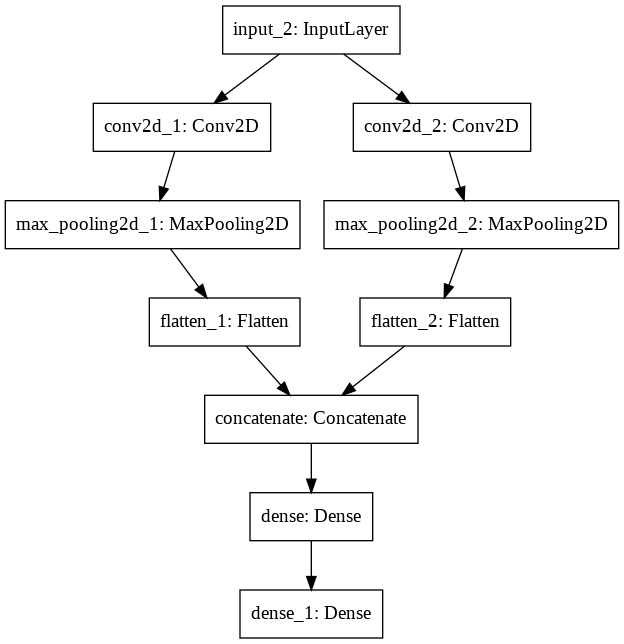

In [11]:
plot_model(model, to_file= 'model.png')